In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
# Default values of parameters for the dynamics of the resident strain
b_1 = 0.3  # Transmission rate of the resident strain
r = 0.012  # birth rate
s_S = 1  # vulnerability to infection
s_I = 2  # vulnerability to a new infection
k = 1  # beta_11 = beta_1*2 Or beta_11=beta_1


# Parameters of the trade-off function
be = 0.4  # Singular strategy
al_be = 0.02  # alpha(beta*)
dal_be = 0.025  # alpha'(beta*)
ddal_be = 0.03  # alpha''(beta*)

In [3]:
# The trade-off function
def alpha(x):
    al = al_be - (((dal_be) ** 2) / ddal_be) * (1 - np.exp((ddal_be * (x - be)) / dal_be))
    return al

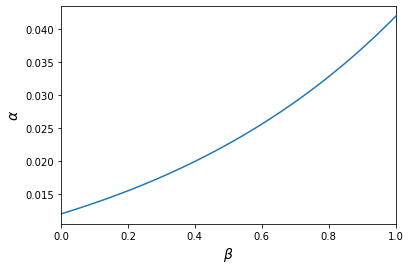

In [4]:
# Produce the plot of the trade-off function
betas = np.linspace(0, 1, 500)
alphas = alpha(betas)
plt.plot(betas, alphas)
plt.xlabel('$\\beta$', fontsize=14)
plt.ylabel('$\\alpha$', fontsize=14)
plt.xlim((0, 1))
plt.show()

In [5]:
# Dynamics of the resident strain
def dy_resident(x, t,
                beta_1 = b_1,
                rho = r,
                sigma_S = s_S,
                sigma_I = s_I,
                beta_11beta_1 = k):
    
    mu = rho
    beta_11 = beta_11beta_1 * beta_1
    alpha_1 = alpha(beta_1)
    alpha_11 = alpha(beta_11)
    lambda_1 = beta_1 * x[1] + beta_11 * x[2]
    dSdt = rho - mu * x[0] - sigma_S * lambda_1 * x[0]
    dIdt = sigma_S * lambda_1 * x[0] - (mu + alpha_1 + sigma_I * lambda_1) * x[1]
    dDdt = sigma_I * lambda_1 * x[1] - (mu + alpha_11) * x[2]
    return dSdt, dIdt, dDdt

In [6]:
# Solve the population dynamics and produce the plot of resident's population dynamics
def plot_dynamics(beta_1 = b_1,
                  rho = r,
                  sigma_S = s_S,
                  sigma_I = s_I,
                  beta_11beta_1 = k):
    
    # Time points
    tmax = 2000
    ts = np.linspace(0, 200, tmax)
    
    # Initial conditions x0 = [S0, I0, D0]
    x0 = [0.4, 0.1, 0.05]
    
    # Solve the population dynamics
    xs = odeint(dy_resident, x0, ts, args = (beta_1, rho, sigma_S, sigma_I, beta_11beta_1))
    Ss = xs[:, 0]
    Is = xs[:, 1]
    Ds = xs[:, 2]
    
    # Find the equilibrium
    S = Ss[tmax - 1]
    I = Is[tmax - 1]
    D = Ds[tmax - 1]
    print("These are the equilibrium points:", "S =", S, "I =", I, "D =", D)
    

    plt.plot(ts, Ss)
    plt.plot(ts, Is)
    plt.plot(ts, Ds)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Densities', fontsize=14)
    plt.xlim((0, 200))
    plt.ylim((0))
    plt.legend(['$S$', '$I_1$', '$D_{11}$'], loc='center right')
    
    plt.show()
#    return S, I, D, I_m, D_1m

These are the equilibrium points: S = 0.09875164837090325 I = 0.043484007142566915 D = 0.3214896786392648


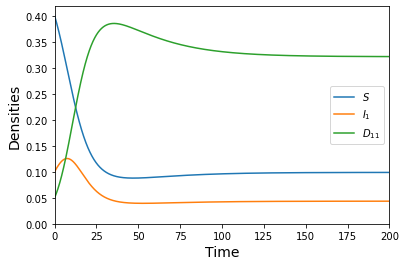

In [7]:
# Case I: coexistence of singly infected and coinfected hosts
plot_dynamics()

These are the equilibrium points: S = 0.9338912657522852 I = 0.004776372901183862 D = 0.0005963586382845018


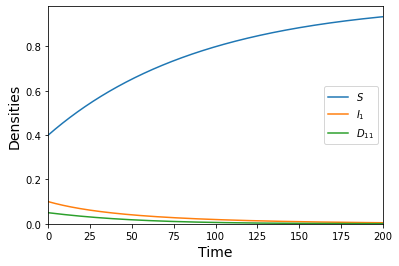

In [8]:
# Case II: disease-free (with low transmission rate)
plot_dynamics(beta_1 = 0.01)

These are the equilibrium points: S = 0.9989050619275093 I = 0.0010282080171498348 D = 2.2570442876536176e-06


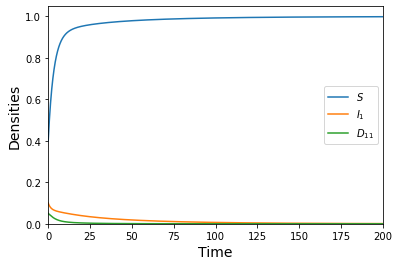

In [9]:
# Or with very high background mortality rate
plot_dynamics(rho = 0.3)

These are the equilibrium points: S = 0.09875164725769361 I = 0.3634909470526813 D = 0.0014827395928126384


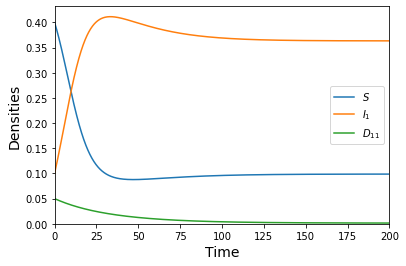

In [10]:
# Case III: single infection only (when it is very hard for (singly) infected hosts to be doubly infected )
plot_dynamics(sigma_I = 0.001)

These are the equilibrium points: S = 0.06459654943949066 I = 0.029759156430604634 D = 0.2747233757047927


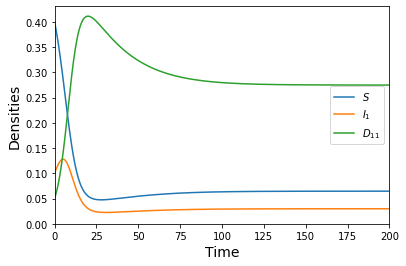

These are the equilibrium points: S = 0.9289275808773625 I = 0.006514849786018638 D = 0.0007066529145005885


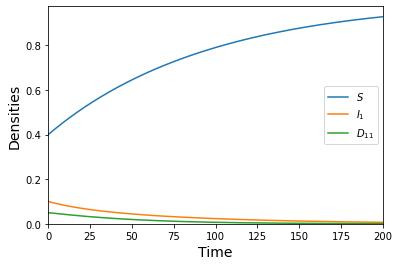

These are the equilibrium points: S = 0.9586945764503719 I = 0.03594275192018404 D = 0.002924900542356571


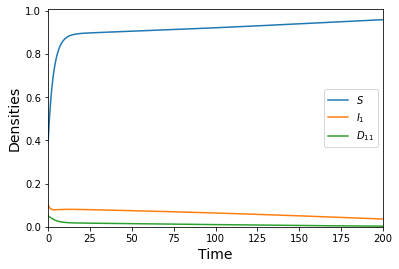

These are the equilibrium points: S = 0.09857893063904337 I = 0.3635422078864369 D = 0.0010894597180775868


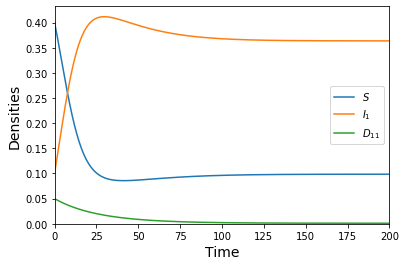

In [11]:
# In Macro-parasite case i.e. beta_11beta_1 = 2
plot_dynamics(beta_11beta_1 = 2)
plot_dynamics(beta_1 = 0.01, beta_11beta_1 = 2)
plot_dynamics(rho = 0.3, beta_11beta_1 = 2)
plot_dynamics(sigma_I = 0.001, beta_11beta_1 = 2)
# It does not a make big difference to the model

These are the equilibrium points: S = 0.09875164727652924 I = 0.07769558364594577 D = 0.2872781031370309


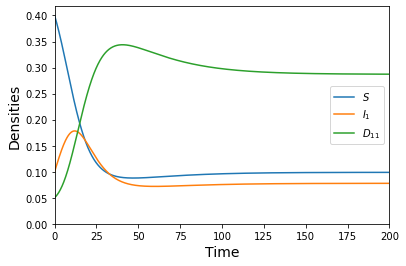

These are the equilibrium points: S = 0.09875164725769361 I = 0.3634909470526813 D = 0.0014827395928126384


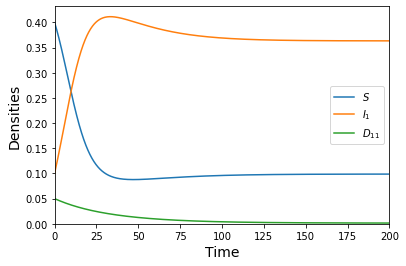

These are the equilibrium points: S = 0.9454254703665075 I = 7.439108534918177e-05 D = 0.00034378164525992956


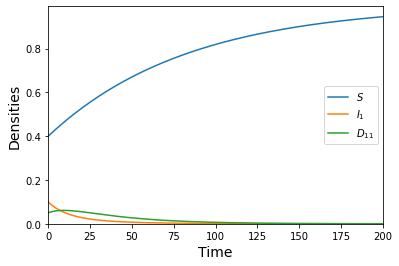

In [12]:
# Analyse the effect of sigma_S and sigma_I
plot_dynamics(sigma_S = 1, sigma_I = 1)
plot_dynamics(sigma_S = 1, sigma_I = 0.001)
plot_dynamics(sigma_S = 0.001, sigma_I = 1)
# If sigma_I is very small, meaning that hosts are very hard to be doubly infected,
# there tends to be single infection only in equilibrium.
# If sigma_S is very small , meaning that hosts are very hard to be infected,
# in equilibrium there tends to be no disease.

These are the equilibrium points: S = 0.09875163984089533 I = 0.004871579557270831 D = 0.3601021351011141


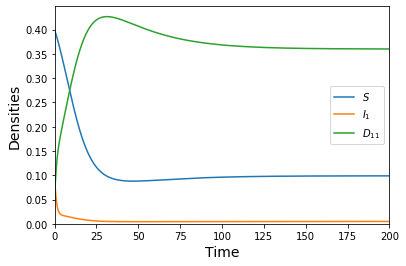

These are the equilibrium points: S = 0.004936033335007225 I = 0.07927328765015361 D = 0.3239056658618481


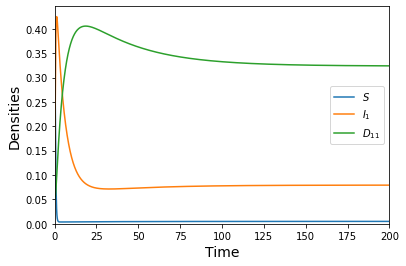

In [13]:
plot_dynamics(sigma_S = 1, sigma_I = 20)
plot_dynamics(sigma_S = 20, sigma_I =1)
# In other cases, the density of doubly infected hosts tends to be higher than that of singly infected hosts.
# Also, if sigma_S is very high, all susceptible hosts tends to be infected.